In [189]:
import pandas as pd
import datetime 
import matplotlib.pyplot as plt

data = pd.read_csv("HiloBayNEW13to15.csv") 
data.head()

,date,cms,logcms,ChlRFU,Doper,saltppt,TempC,chlcal,Corr.NTU
0,2013-01-01 00:00:00,2.14524,0.331469,0.225,96.375,33.0425,24.0375,0.24250,0.575
1,2013-01-01 01:00:00,2.12400,0.327155,0.200,95.825,33.2775,24.0825,0.12125,0.600
2,2013-01-01 02:00:00,2.09568,0.321305,0.150,95.975,32.2475,23.8375,0.12125,0.675
3,2013-01-01 03:00:00,2.07444,0.316893,0.150,96.300,31.7525,23.7100,0.00000,0.675
4,2013-01-01 04:00:00,2.04612,0.310923,0.200,96.725,31.1550,23.6375,0.12125,0.800


In [190]:
data.rename(columns = {'Corr.NTU' : 'TURB'}, inplace = True)
data.head()

,date,cms,logcms,ChlRFU,Doper,saltppt,TempC,chlcal,TURB
0,2013-01-01 00:00:00,2.14524,0.331469,0.225,96.375,33.0425,24.0375,0.24250,0.575
1,2013-01-01 01:00:00,2.12400,0.327155,0.200,95.825,33.2775,24.0825,0.12125,0.600
2,2013-01-01 02:00:00,2.09568,0.321305,0.150,95.975,32.2475,23.8375,0.12125,0.675
3,2013-01-01 03:00:00,2.07444,0.316893,0.150,96.300,31.7525,23.7100,0.00000,0.675
4,2013-01-01 04:00:00,2.04612,0.310923,0.200,96.725,31.1550,23.6375,0.12125,0.800


In [191]:
date_time = []
for i in range(0,len(data.date)):
    date = data.date
    date = date[i]
    
    date_time.append(datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S')) 


In [192]:
date_time[0:10]

[datetime.datetime(2013, 1, 1, 0, 0),
 datetime.datetime(2013, 1, 1, 1, 0),
 datetime.datetime(2013, 1, 1, 2, 0),
 datetime.datetime(2013, 1, 1, 3, 0),
 datetime.datetime(2013, 1, 1, 4, 0),
 datetime.datetime(2013, 1, 1, 5, 0),
 datetime.datetime(2013, 1, 1, 6, 0),
 datetime.datetime(2013, 1, 1, 7, 0),
 datetime.datetime(2013, 1, 1, 8, 0),
 datetime.datetime(2013, 1, 1, 9, 0)]

<IPython.core.display.Javascript object>


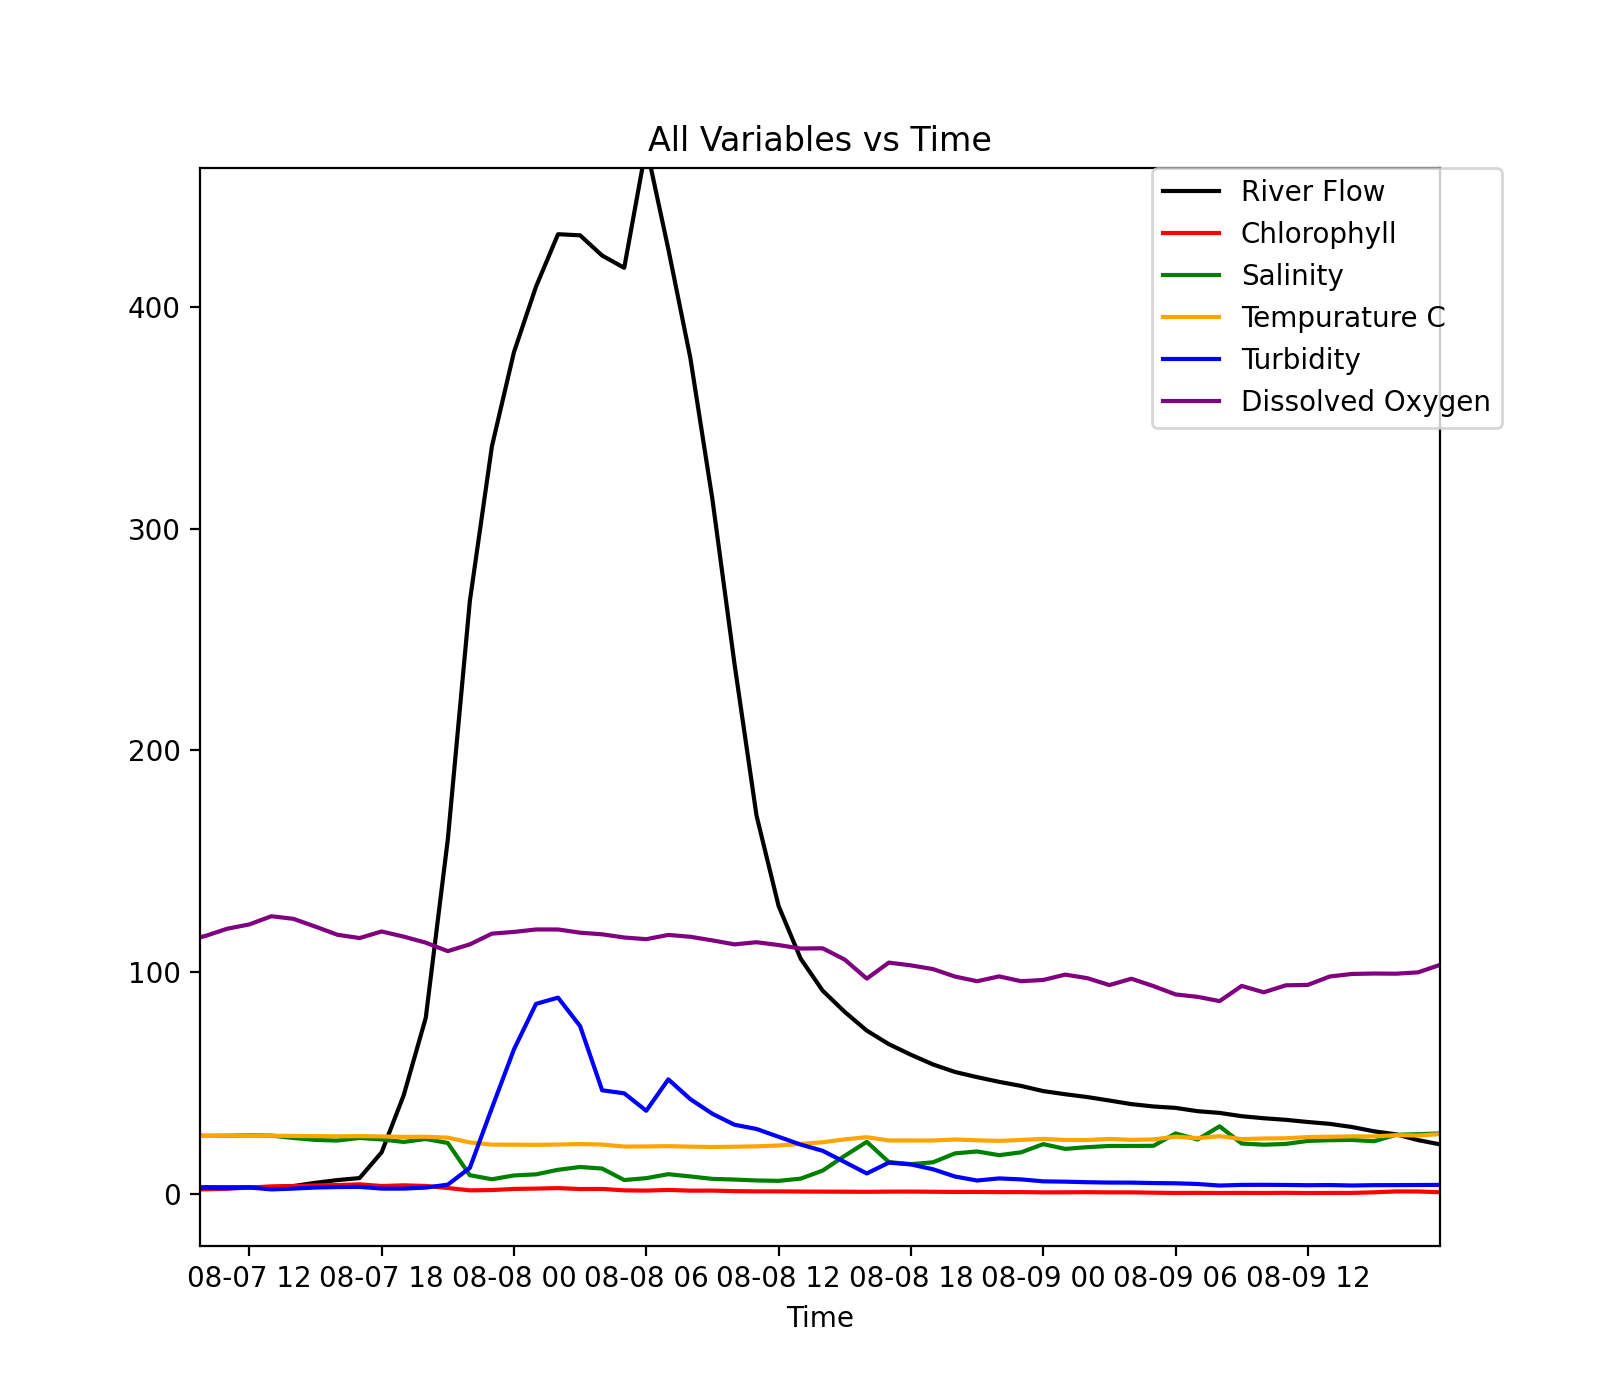

In [195]:
%matplotlib notebook
from mpl_toolkits.axes_grid1 import host_subplot
from mpl_toolkits import axisartist

plt.figure(figsize=(8, 7))



plt.plot(date_time, data.cms, color = "black",label="River Flow")
plt.plot(date_time, data.ChlRFU, color="red",label="Chlorophyll")
plt.plot(date_time, data.saltppt, color="green",label="Salinity")
plt.plot(date_time, data.TempC, color="orange",label="Tempurature C")
plt.plot(date_time, data.TURB ,color="blue",label="Turbidity")
plt.plot(date_time, data.Doper, color="purple",label="Dissolved Oxygen")
plt.title("All Variables vs Time")
plt.xlabel("Time")
plt.legend(bbox_to_anchor=(1.05, 1),borderaxespad=0.)

plt.show()
plt.savefig("my_figure.png", dpi=300) 

<IPython.core.display.Javascript object>


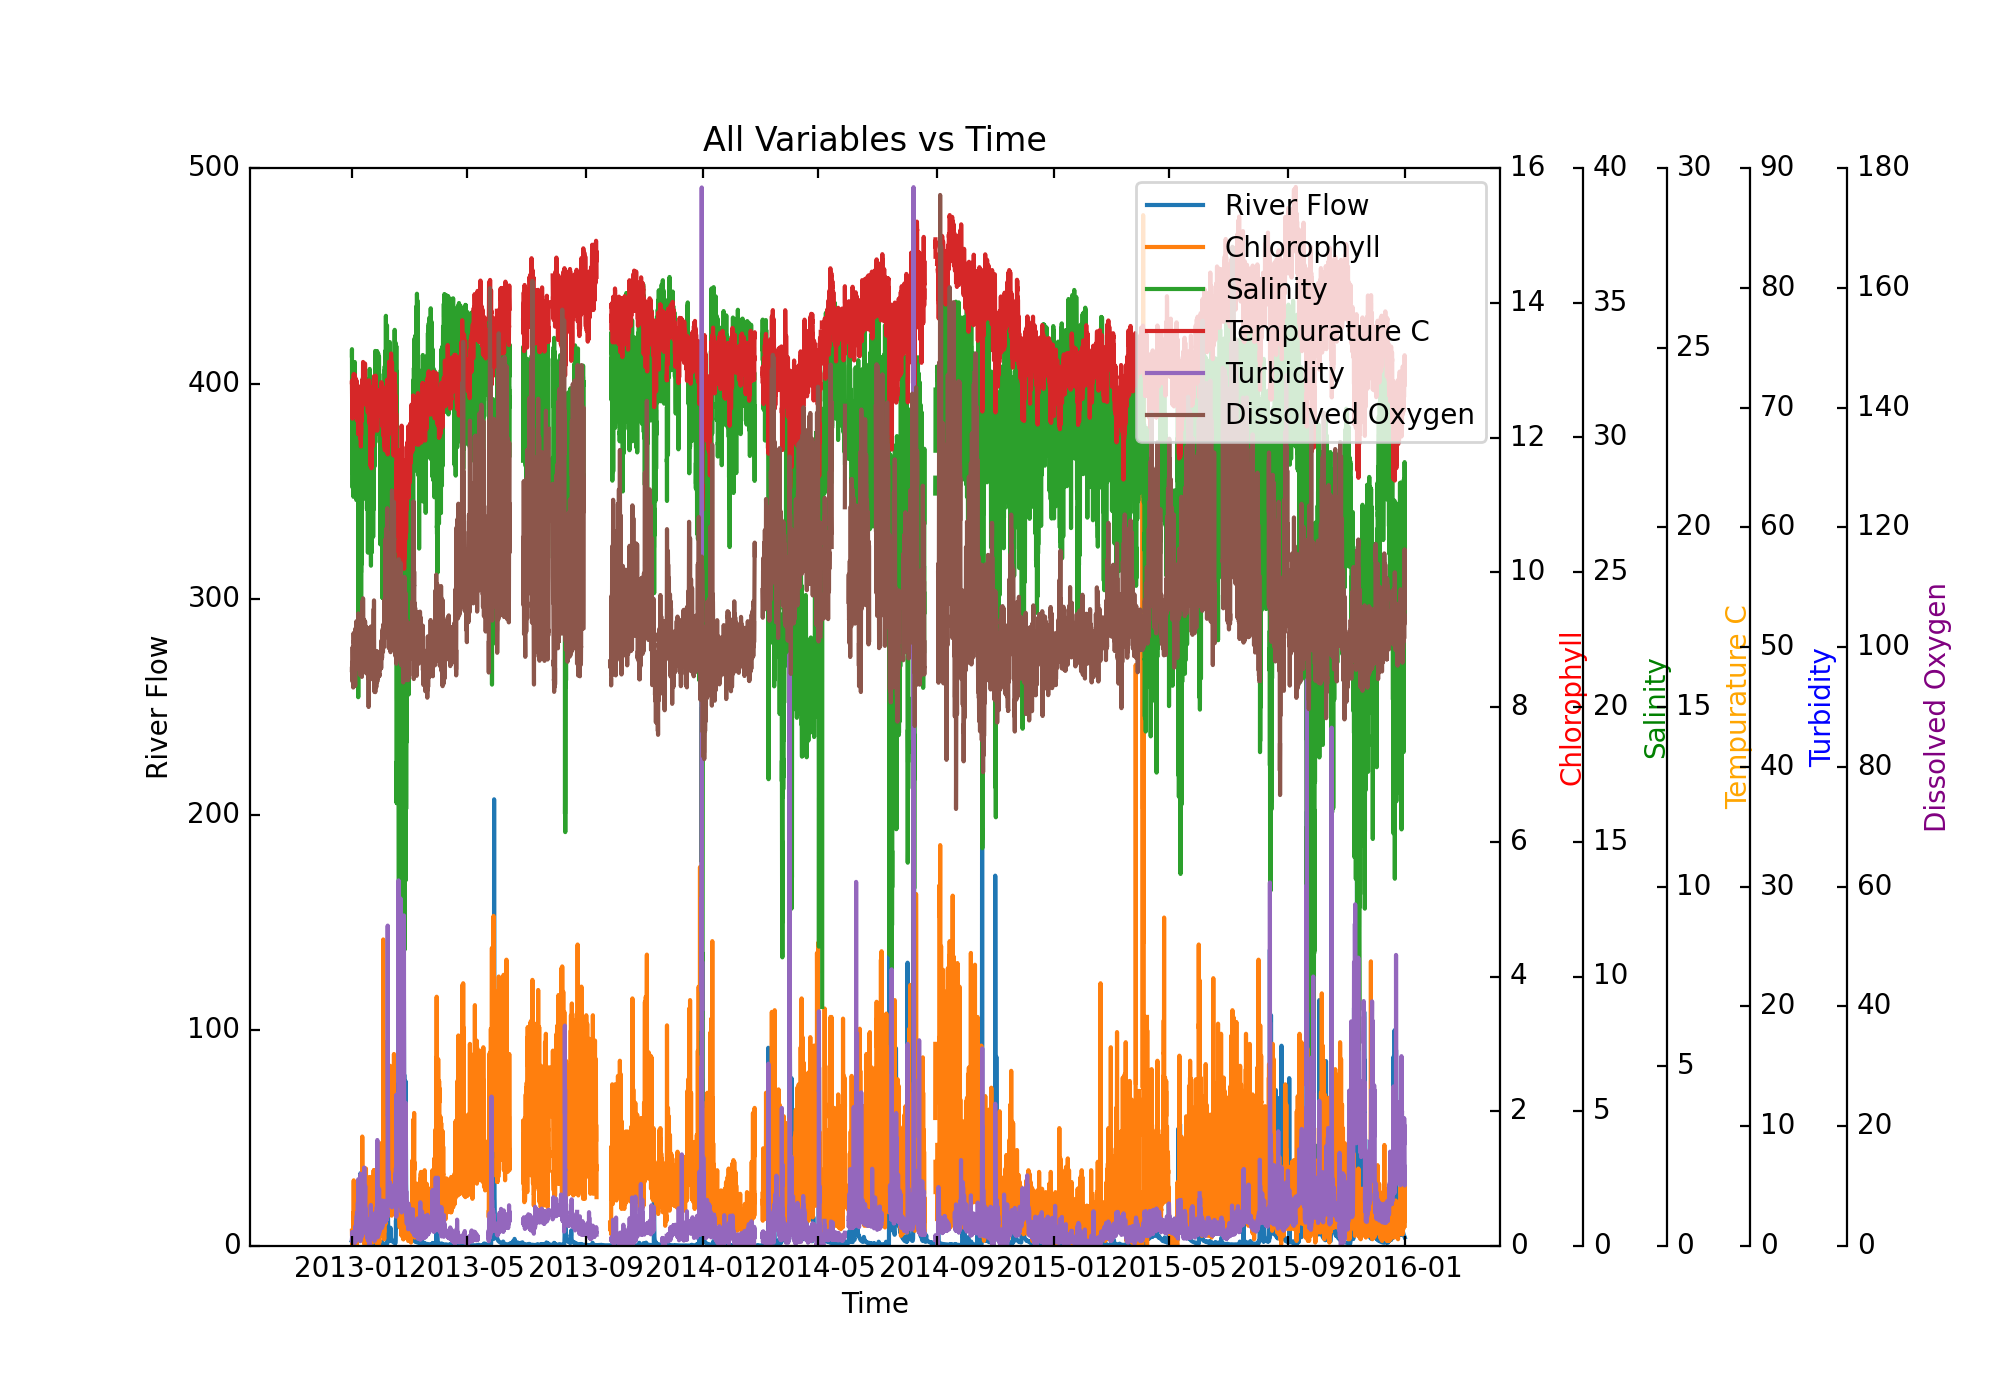

In [261]:
%matplotlib notebook
from mpl_toolkits.axes_grid1 import host_subplot
from mpl_toolkits import axisartist

plt.figure(figsize=(10, 7))

host = host_subplot(111, axes_class=axisartist.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()
par4 = host.twinx()
par5 = host.twinx()

par2.axis["right"] = par2.new_fixed_axis(loc="right", offset=(30, 0))
par3.axis["right"] = par3.new_fixed_axis(loc="right", offset=(60, 0))
par4.axis["right"] = par4.new_fixed_axis(loc="right", offset=(90, 0))
par5.axis["right"] = par5.new_fixed_axis(loc="right", offset=(125, 0))


par1.axis["right"].toggle(all=True)
par2.axis["right"].toggle(all=True)
par3.axis["right"].toggle(all=True)
par4.axis["right"].toggle(all=True)
par5.axis["right"].toggle(all=True)

p1 = host.plot(date_time, data.cms,label="River Flow")
p2 = par1.plot(date_time, data.ChlRFU,label="Chlorophyll")
p3 = par2.plot(date_time, data.saltppt,label="Salinity")
p4 = par3.plot(date_time, data.TempC, label="Tempurature C")
p5 = par4.plot(date_time, data.TURB,label="Turbidity")
p6 = par5.plot(date_time, data.Doper, label="Dissolved Oxygen")
plt.title("All Variables vs Time")
plt.xlabel("Time")

host.set_xlim(15600, 16900)
host.set_ylim(0, 500)
par1.set_ylim(0, 16)
par2.set_ylim(0, 40)
par3.set_ylim(0, 30)
par4.set_ylim(0, 90)
par5.set_ylim(0, 180)

host.set_xlabel("Time")
host.set_ylabel("River Flow")
par1.set_ylabel("Chlorophyll")
par2.set_ylabel("Salinity")
par3.set_ylabel("Tempurature C")
par4.set_ylabel("Turbidity")
par5.set_ylabel("Dissolved Oxygen")

host.legend()
host.axis["left"].label.set_color("black")
par1.axis["right"].label.set_color("red")
par2.axis["right"].label.set_color("green")
par3.axis["right"].label.set_color("orange")
par4.axis["right"].label.set_color("blue")
par5.axis["right"].label.set_color("purple")


plt.show()
plt.savefig("my_figureAXIS.png", dpi=300) 

# Chlorophyll and River Flow

<IPython.core.display.Javascript object>


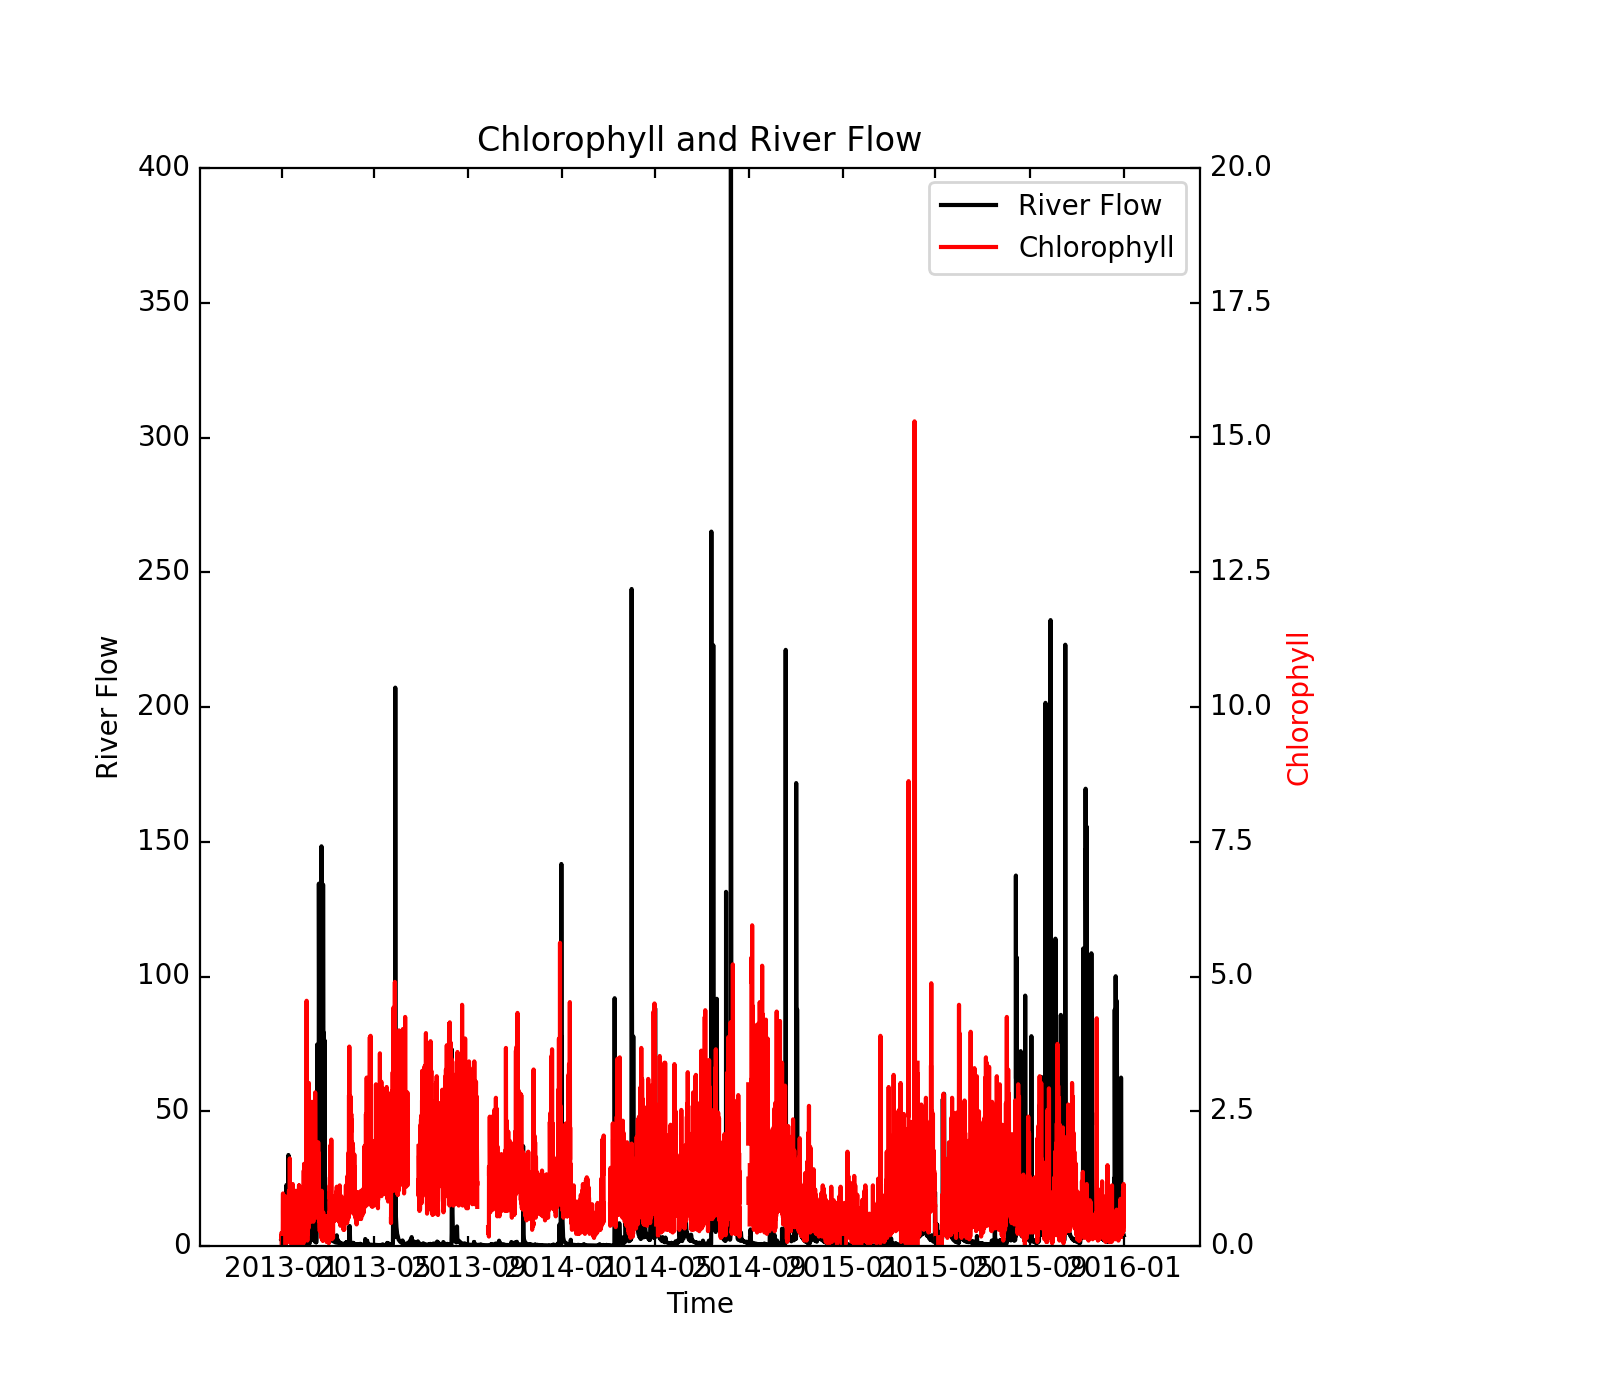

In [257]:
%matplotlib notebook
from mpl_toolkits.axes_grid1 import host_subplot
from mpl_toolkits import axisartist

plt.figure(figsize=(8, 7))
host = host_subplot(111, axes_class=axisartist.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()

par1.axis["right"].toggle(all=True)

p1 = host.plot(date_time, data.cms, color = "black",label="River Flow")
p2 = par1.plot(date_time, data.ChlRFU, color="red",label="Chlorophyll")

host.set_xlim(15600, 16900)
host.set_ylim(0, 400)
par1.set_ylim(0, 20)

host.set_xlabel("Time")
host.set_ylabel("River Flow")
par1.set_ylabel("Chlorophyll")

host.legend()

host.axis["left"].label.set_color("black")
par1.axis["right"].label.set_color("red")


plt.title("Chlorophyll and River Flow")
plt.show()
plt.savefig("my_figureCHL.png", dpi=300) 

# Salinity and River Flow

<IPython.core.display.Javascript object>


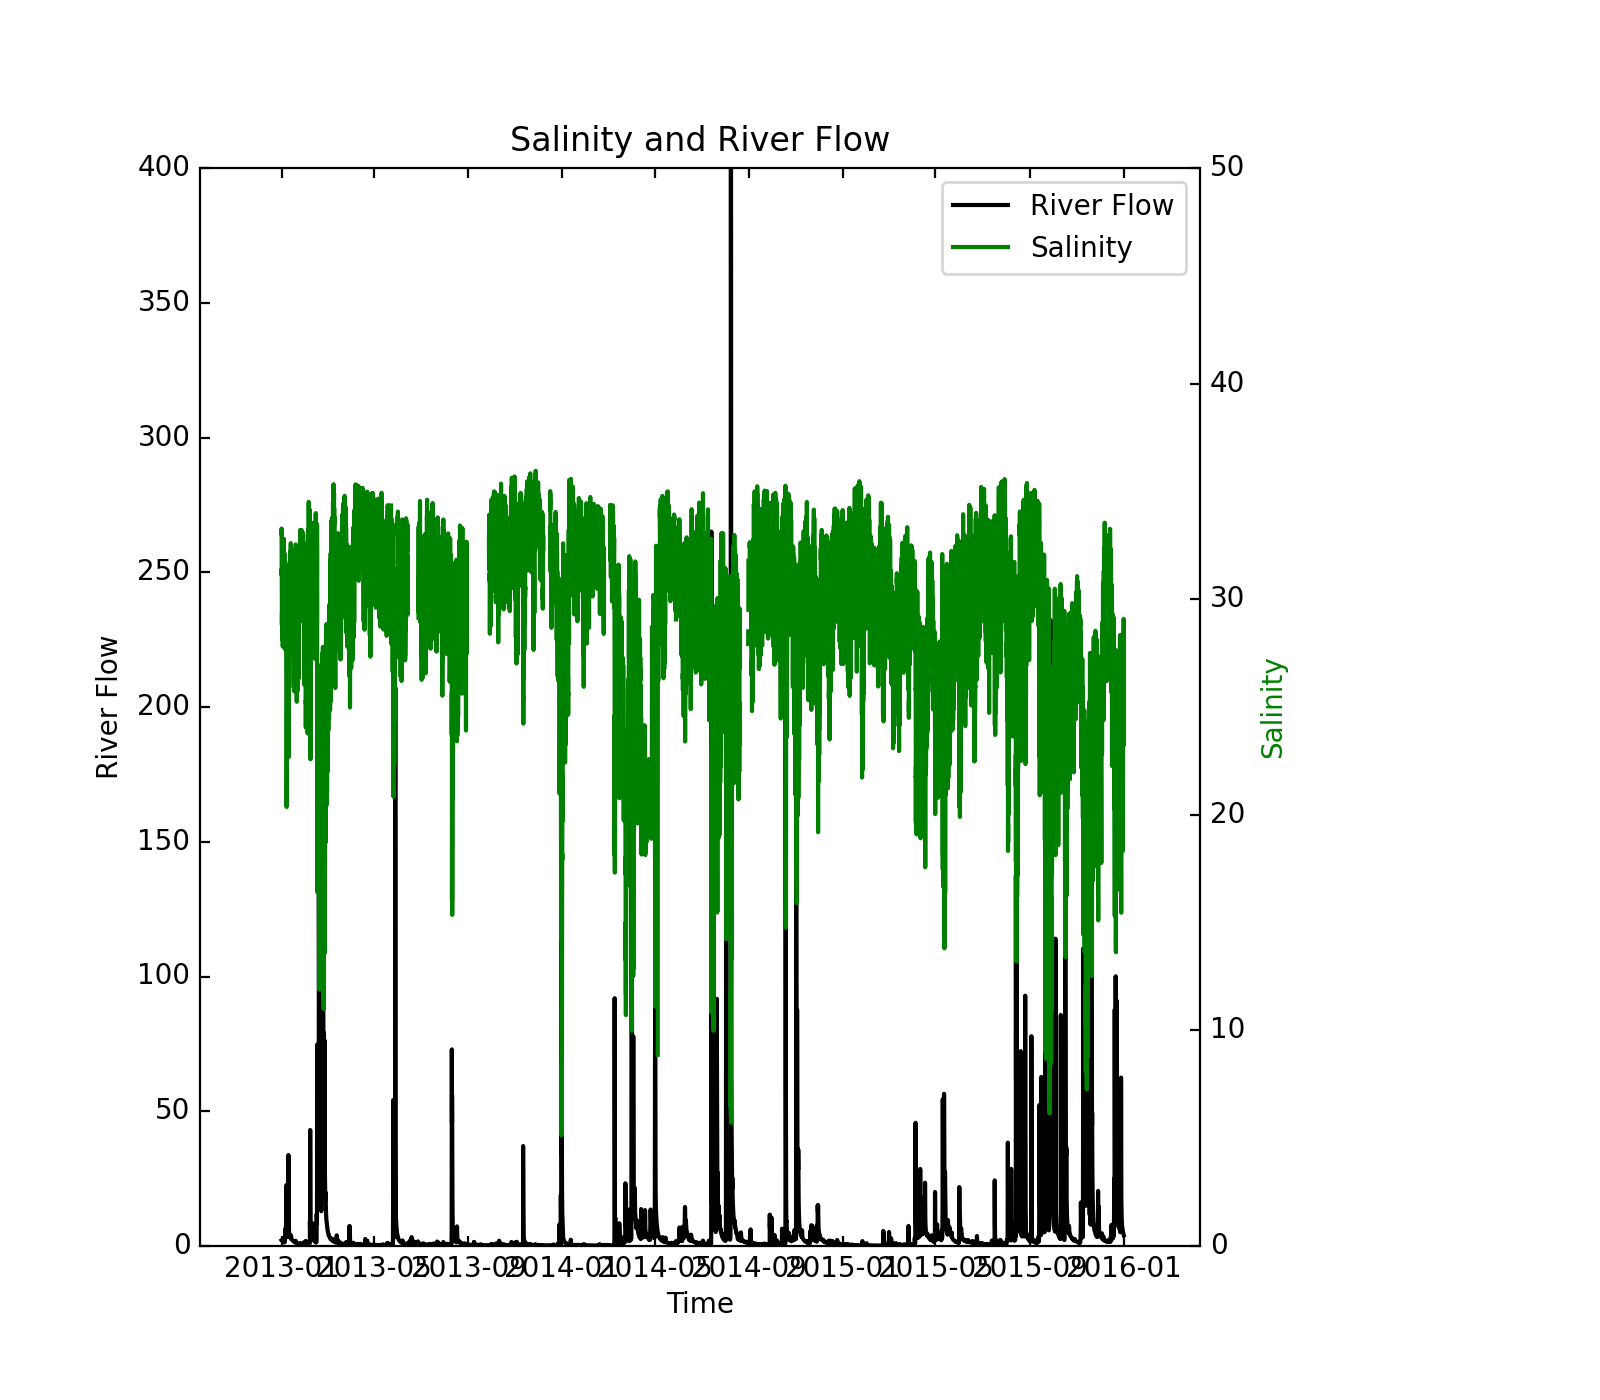

In [258]:
%matplotlib notebook
from mpl_toolkits.axes_grid1 import host_subplot
from mpl_toolkits import axisartist

plt.figure(figsize=(8, 7))
host = host_subplot(111, axes_class=axisartist.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()

par1.axis["right"].toggle(all=True)

p1 = host.plot(date_time, data.cms, color = "black",label="River Flow")
p2 = par1.plot(date_time, data.saltppt, color="green",label="Salinity")

host.set_xlim(15600, 16900)
host.set_ylim(0, 400)
par1.set_ylim(0, 50)

host.set_xlabel("Time")
host.set_ylabel("River Flow")
par1.set_ylabel("Salinity")

host.legend()

host.axis["left"].label.set_color("black")
par1.axis["right"].label.set_color("green")


plt.title("Salinity and River Flow")
plt.show()

plt.savefig("my_figureSALT.png", dpi=300) 

# Tempurature and River Flow

<IPython.core.display.Javascript object>


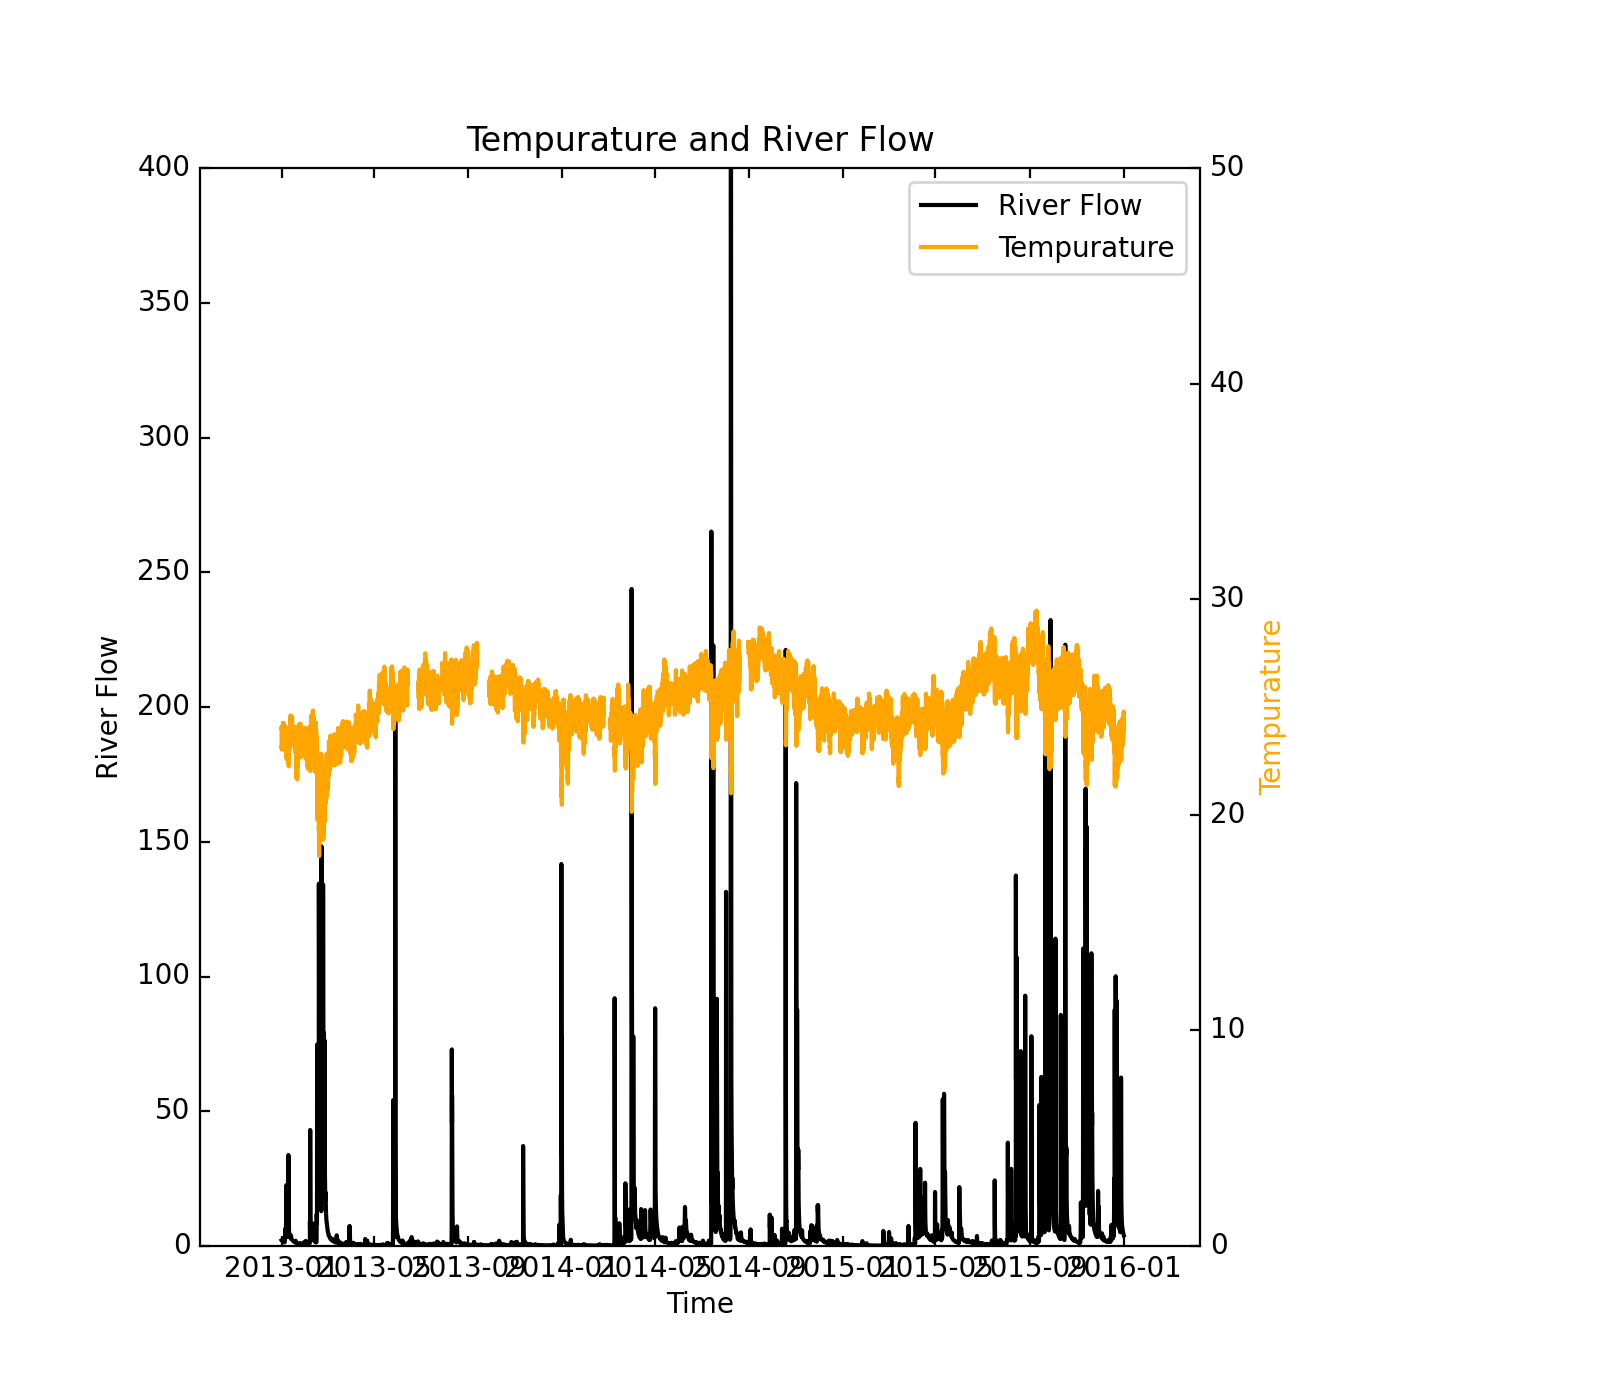

In [259]:
%matplotlib notebook
from mpl_toolkits.axes_grid1 import host_subplot
from mpl_toolkits import axisartist

plt.figure(figsize=(8, 7))
host = host_subplot(111, axes_class=axisartist.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()

par1.axis["right"].toggle(all=True)

p1 = host.plot(date_time, data.cms, color = "black",label="River Flow")
p2 = par1.plot(date_time, data.TempC, color="orange",label="Tempurature")

host.set_xlim(15600, 16900)
host.set_ylim(0, 400)
par1.set_ylim(0, 50)

host.set_xlabel("Time")
host.set_ylabel("River Flow")
par1.set_ylabel("Tempurature")

host.legend()

host.axis["left"].label.set_color("black")
par1.axis["right"].label.set_color("orange")


plt.title("Tempurature and River Flow")
plt.show()

plt.savefig("my_figureTEMP.png", dpi=300) 

# Turbidity and River Flow

<IPython.core.display.Javascript object>


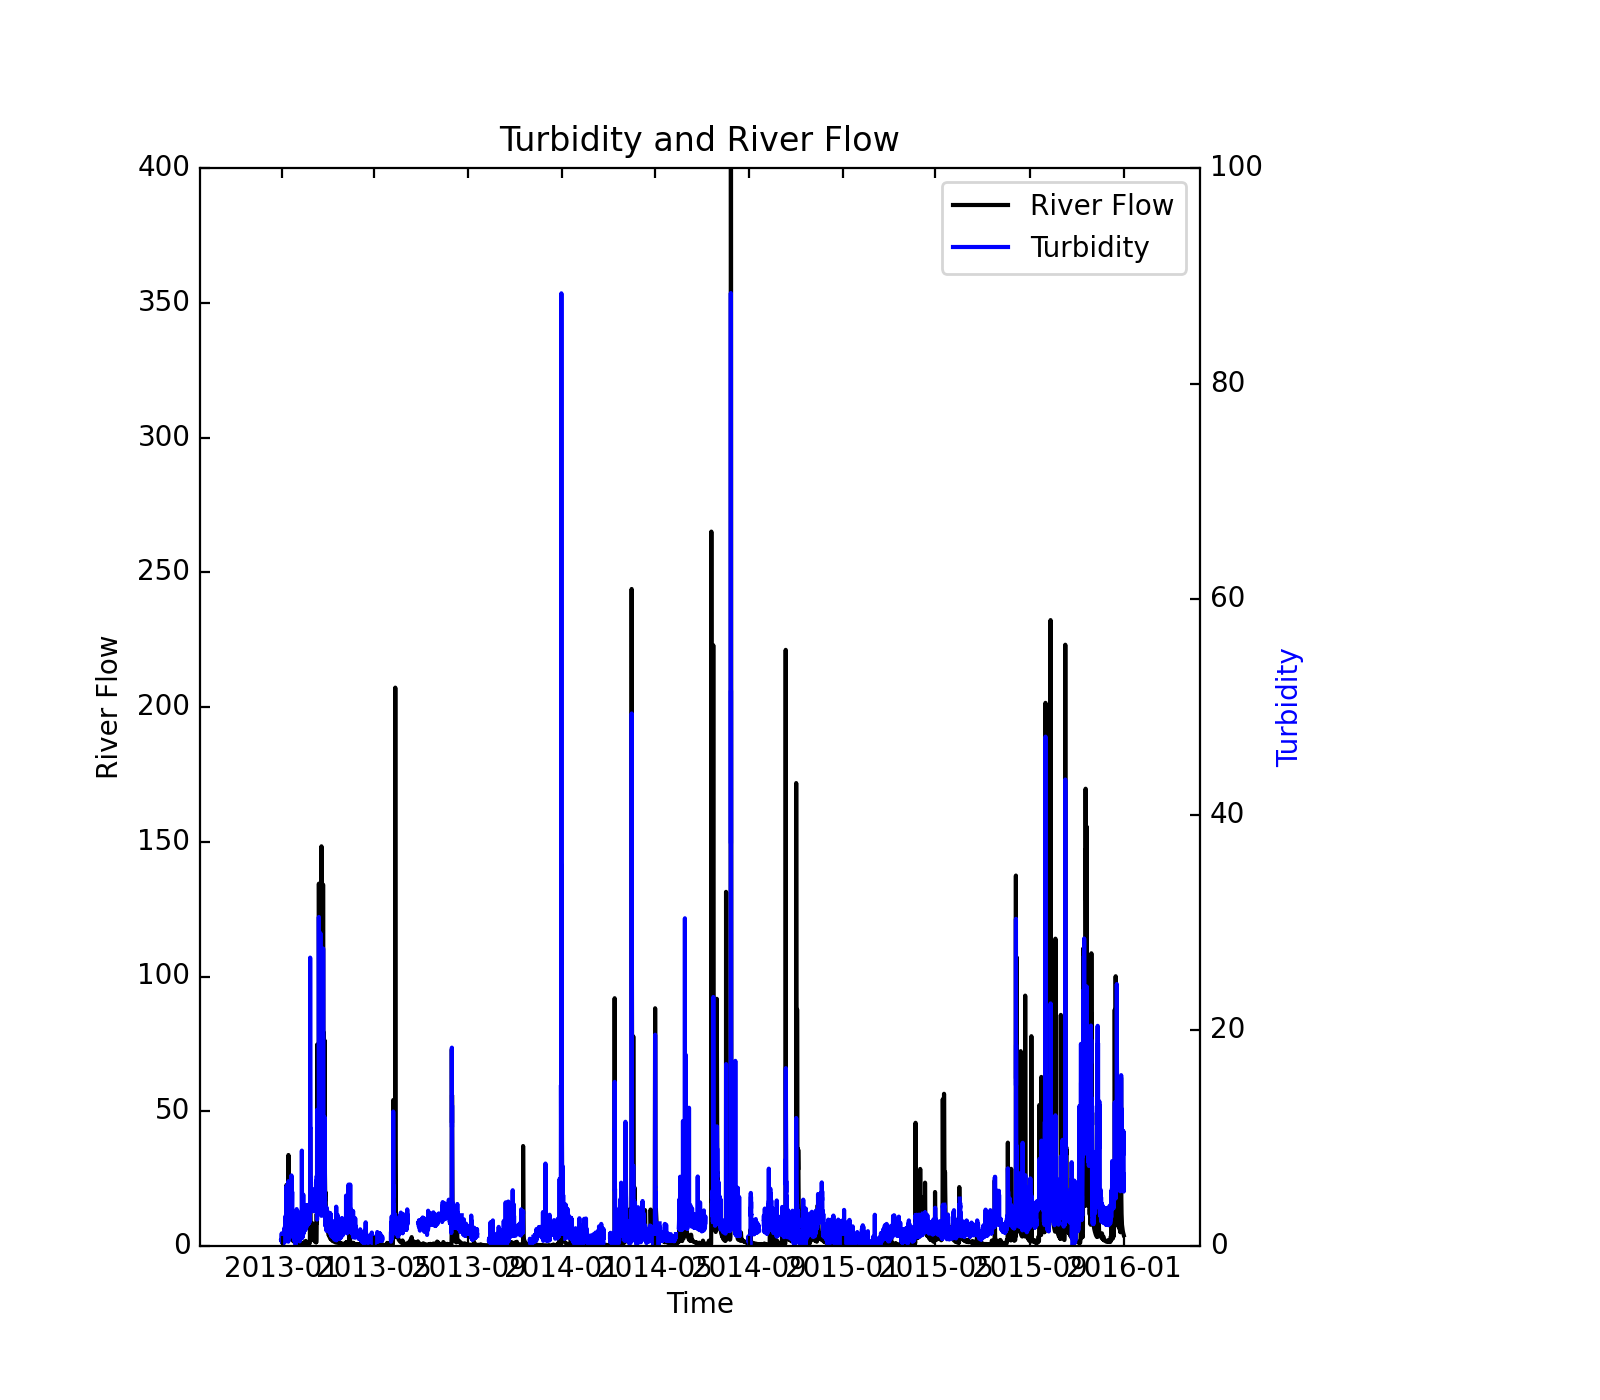

In [262]:
%matplotlib notebook
from mpl_toolkits.axes_grid1 import host_subplot
from mpl_toolkits import axisartist

plt.figure(figsize=(8, 7))
host = host_subplot(111, axes_class=axisartist.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()

par1.axis["right"].toggle(all=True)

p1 = host.plot(date_time, data.cms, color = "black",label="River Flow")
p2 = par1.plot(date_time, data.TURB, color="blue",label="Turbidity")

host.set_xlim(15600, 16900)
host.set_ylim(0, 400)
par1.set_ylim(0, 100)

host.set_xlabel("Time")
host.set_ylabel("River Flow")
par1.set_ylabel("Turbidity")

host.legend()

host.axis["left"].label.set_color("black")
par1.axis["right"].label.set_color("blue")


plt.title("Turbidity and River Flow")
plt.show()

plt.savefig("my_figureTURB.png", dpi=300) 

# Dissolved Oxygen and River Flow

<IPython.core.display.Javascript object>


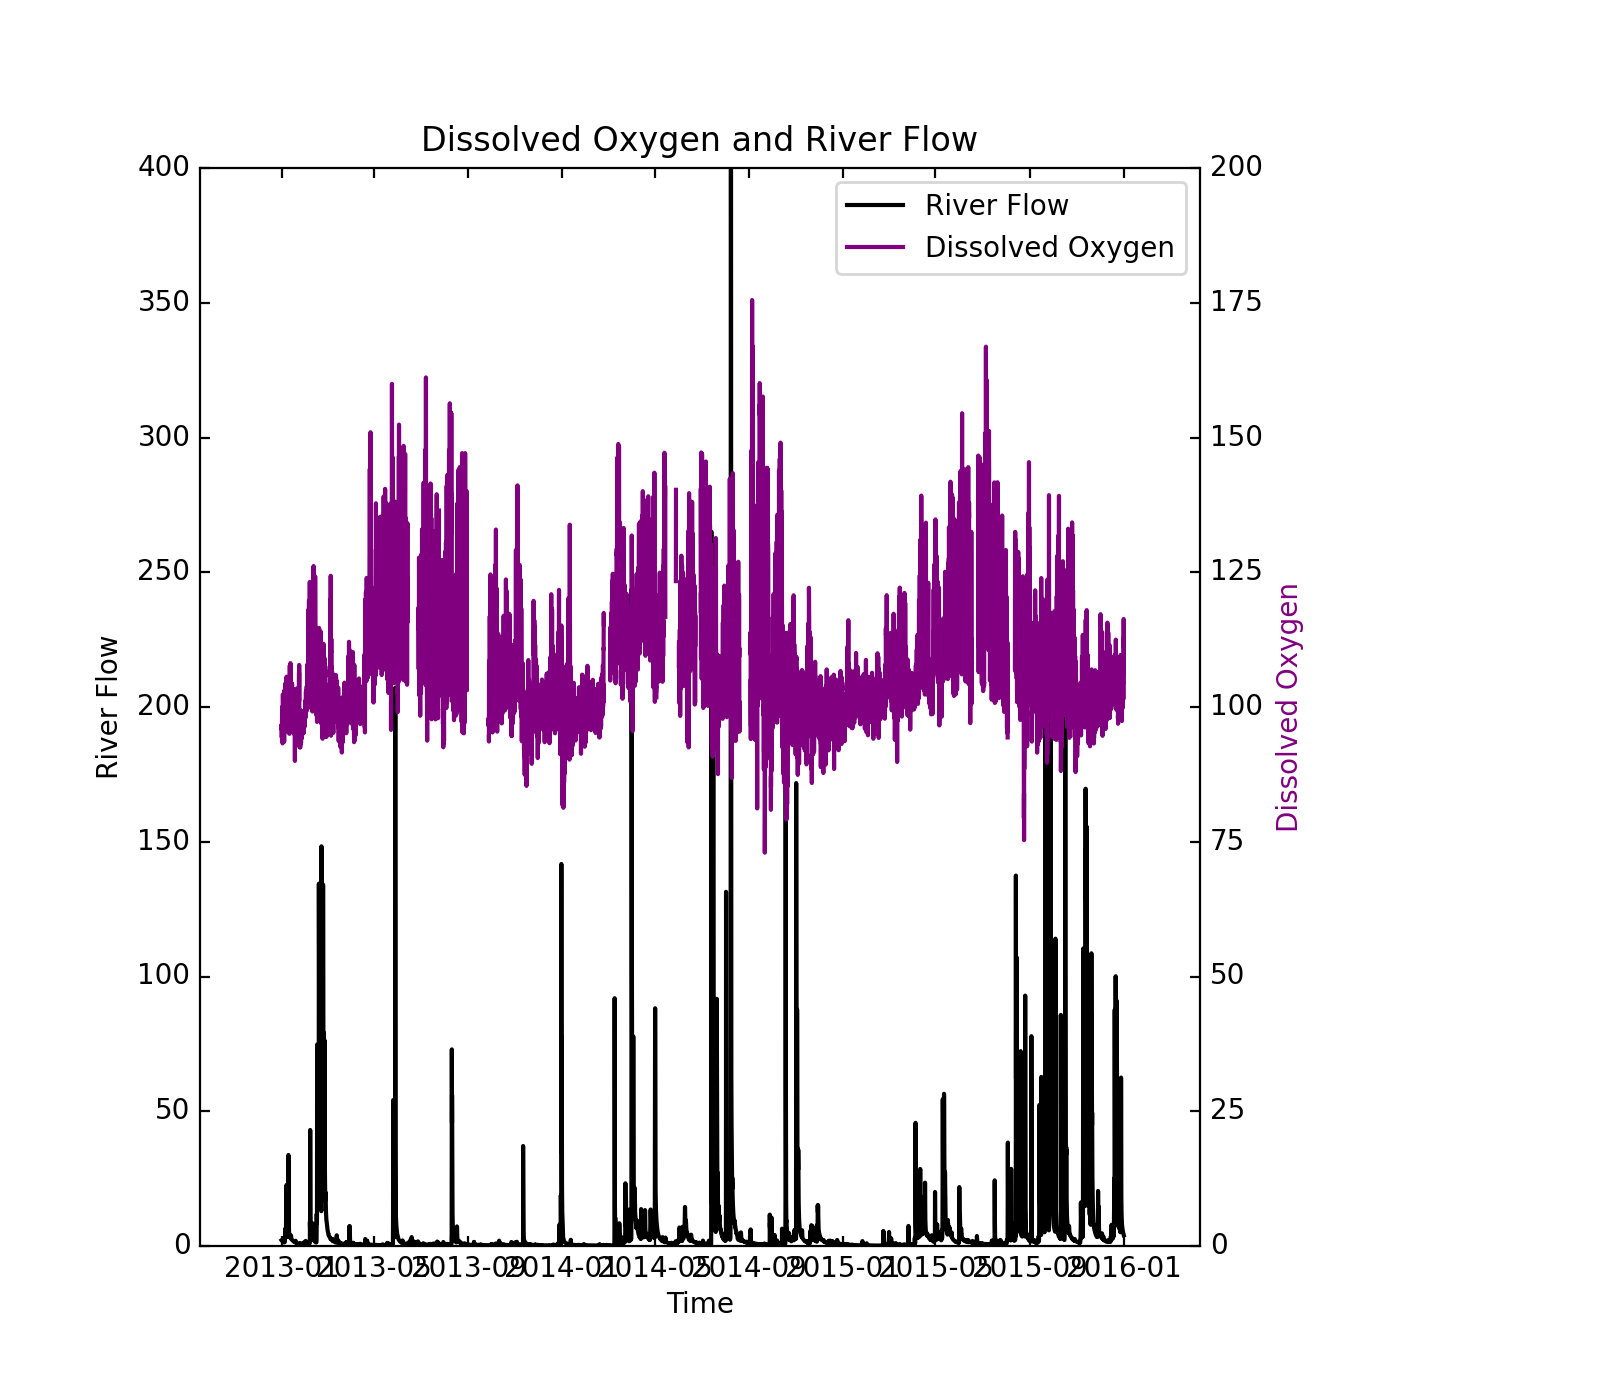

In [263]:
%matplotlib notebook
from mpl_toolkits.axes_grid1 import host_subplot
from mpl_toolkits import axisartist

plt.figure(figsize=(8, 7))
host = host_subplot(111, axes_class=axisartist.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()

par1.axis["right"].toggle(all=True)

p1 = host.plot(date_time, data.cms, color = "black",label="River Flow")
p2 = par1.plot(date_time, data.Doper, color="purple",label="Dissolved Oxygen")

host.set_xlim(15600, 16900)
host.set_ylim(0, 400)
par1.set_ylim(0, 200)

host.set_xlabel("Time")
host.set_ylabel("River Flow")
par1.set_ylabel("Dissolved Oxygen")

host.legend()

host.axis["left"].label.set_color("black")
par1.axis["right"].label.set_color("purple")


plt.title("Dissolved Oxygen and River Flow")
plt.show()

plt.savefig("my_figureDOSO.png", dpi=300) 